# Análise de dados de ASMA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Leitura de dados

In [7]:
df = pd.read_csv("./data/ASMA_SBGR_C100_flight.csv")
df.head()

,id,fltid,adep,ades,CLASS,atot,c_time,lat,lon,bear,...,sector,congestion,arrival_yield,transit,saturation,c,percentile_20,kpi08_p20,unimp_time,kpi08
0,2024-01-21 04:44:32AZU4329SBRFSBGR,AZU4329,SBRF,SBGR,M,1.705812e+12,1705810673824,-21.797379,-46.124934,11.997184,...,0,5,10,26.636267,8.603308,100,21.50827,5.127997,21.654675,4.981592
1,2024-01-04 14:11:08AZU9112SBCFSBGR,AZU9112,SBCF,SBGR,M,1.704377e+12,1704375864237,-21.876556,-45.864650,21.318404,...,0,4,7,26.729383,8.603308,100,21.50827,5.221113,21.654675,5.074708
2,2024-01-21 09:44:43TAM4752SBBRSBGR,TAM4752,SBBR,SBGR,M,1.705830e+12,1705828130796,-21.789752,-46.211813,9.019448,...,0,16,25,35.870067,8.603308,100,21.50827,14.361797,21.654675,14.215392
3,2024-01-21 09:02:19TAM4555SBPSSBGR,TAM4555,SBPS,SBGR,M,1.705828e+12,1705826386707,-21.846861,-45.953015,18.125271,...,0,8,20,22.538217,8.603308,100,21.50827,1.029947,21.654675,0.883542
4,2024-01-21 10:09:23AZU9112SBCFSBGR,AZU9112,SBCF,SBGR,M,1.705832e+12,1705829471244,-21.785632,-46.247884,7.771361,...,0,16,27,38.195933,8.603308,100,21.50827,16.687663,21.654675,16.541258


### Agrupamento por RWY, Setor ASMA, Esteira de Turbulência e cálculo de tempo de trânsito mínimo e máximo por grupo

In [14]:
df_groupby = (
    df.groupby(['drwy', 'sector', 'CLASS'])
      .agg(
          unimp_time_medio=('percentile_20', 'mean'),
          transit_minimo=('transit', 'min'),
          transit_maximo=('transit', 'max'),
          numero_observacoes=('transit', 'count')
      )
      .reset_index()
)

In [15]:
df_groupby

,drwy,sector,CLASS,unimp_time_medio,transit_minimo,transit_maximo,numero_observacoes
0,10L,0,H,21.185017,18.491717,40.234667,18
1,10L,0,L,28.127617,28.127617,28.127617,1
2,10L,0,M,22.341217,19.546583,31.572900,115
3,10L,1,H,21.562380,20.518517,30.336917,9
4,10L,1,M,20.575713,17.585150,52.216800,38
5,10L,2,H,18.930177,18.019433,36.764067,12
6,10L,2,M,19.066317,18.215350,33.498783,41
7,10L,3,H,23.111100,22.542517,26.846067,10
8,10L,3,M,24.954150,23.702450,37.839917,13
9,10R,-1,H,24.565230,28.221417,101.858833,3


### Seleção de Cabeceira

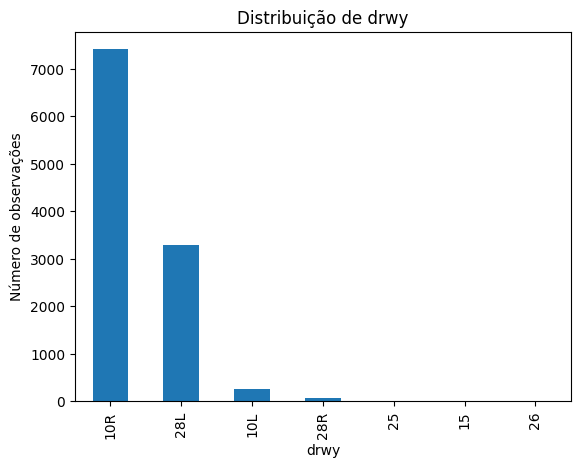

In [17]:
df['drwy'].value_counts().plot(kind='bar')
plt.xlabel('drwy')
plt.ylabel('Número de observações')
plt.title('Distribuição de drwy')
plt.show()

A pista mais usada para pouso é a 10R

### Grupos Pista 10R

In [30]:
# selecao apenas de grupos da cabeceira 10R
df_10r_summary = df_groupby[df_groupby["drwy"]=='10R'].sort_values("numero_observacoes", ascending=False)
# removendo dados com setor ruído (setor = -1)
df_10r_summary[df_10r_summary["sector"]!=-1]

,drwy,sector,CLASS,unimp_time_medio,transit_minimo,transit_maximo,numero_observacoes
13,10R,0,M,22.792943,19.111117,78.516533,2934
16,10R,1,M,23.829707,17.423517,85.121883,1665
19,10R,2,M,21.456567,16.846217,70.264500,1006
11,10R,0,H,21.944563,19.933317,47.336567,668
22,10R,3,M,24.937317,21.760633,85.730233,511
20,10R,3,H,24.260040,21.487417,70.444250,224
17,10R,2,H,20.412500,16.316300,37.867583,172
14,10R,1,H,20.955033,18.476717,54.029633,106
12,10R,0,L,25.004157,20.195100,119.962700,32
18,10R,2,L,27.807147,19.745983,57.199100,32


### Visualização dos Setores

In [38]:
df['sector'].astype('str')

0        0
1        0
2        0
3        0
4        0
        ..
11003    0
11004    1
11005    3
11006    3
11007    2
Name: sector, Length: 11008, dtype: object

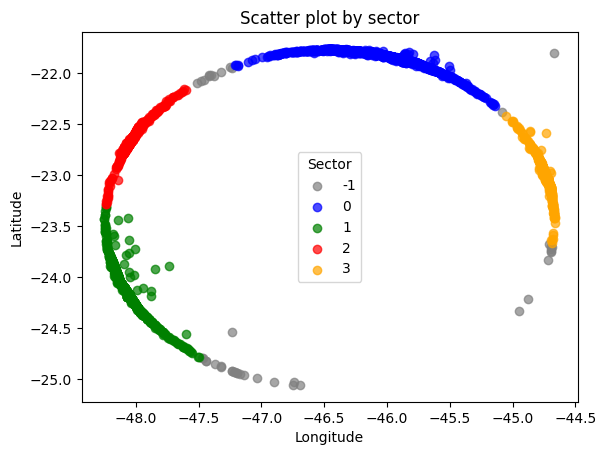

In [58]:
import matplotlib.pyplot as plt

# Prepara o dataframe
df_plot_sector = df[['lat', 'lon', 'sector']].dropna()

# Define as cores
colors = {
    -1: 'grey',
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'orange'
}

# Mapeia a coluna 'sector' para uma nova coluna 'color'
df_plot_sector['color'] = df_plot_sector['sector'].map(colors)

# Cria a figura
fig, ax = plt.subplots()

# Plota cada setor separadamente para poder criar a legenda
for sector, group in df_plot_sector.groupby('sector'):
    ax.scatter(group['lon'], group['lat'], 
               color=colors[sector], 
               label=f'{sector}', 
               alpha=0.7)

# Configurações do gráfico
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Scatter plot by sector')
ax.legend(title='Sector')  # Legenda
plt.show()


### Seleção de período de testes

In [ ]:
#TODO - Ver dias com mais movimentos
#TODO - Ver horas com mais movimentos
# Dentre os dias com mais movimentos, quais utilizam a cabeceira 10R?